# <center> <font color='red'>Thème: Analyse & Complexité des Algorithmes</font>

## <center> <font color='green'>Objectif :Analyser expérimentalement les performes des algorithmes de Tri </font>

### <center> <font color='orange'>Réalisée par: Ahlem Brahmi 2DNI2 </font>

In [1]:
from datetime import *
import matplotlib.pyplot as plt
import time
from random import randint
import numpy as np

## Tri rapide

In [2]:
def Tri_rapide(v,pivot):
    v1=[]
    v2=[]
    v3=[]
    for i in range(len(v)):
        x=v[i]
        if (x<pivot):
            v1.append(x)
        elif(x>pivot):
            v3.append(x)
        else:
            v2.append(x)
    return (v1,v2,v3)  
def tri_rapide(v):
    if len(v)<=1:
        return v
    else:
        pivot=v[0]
        (v1,v2,v3)=choisi_pivot(v,pivot)
        v1=tri_rapide(v1)
        v3=tri_rapide(v3)
    return list(v1+v2+v3)

In [3]:
class Compteur(object):
    def __init__(self, nom):
        self.nom = nom

    def __enter__(self):
        self.t_debut = time.time()

    def __exit__(self, exc_ty, exc_val, exc_tb):
        t_fin = time.time()
        print('{}: {}'.format(self.nom, t_fin - self.t_debut))


In [4]:
t = [randint(0, 1000) for i in range(90000)]

In [5]:
with Compteur("Tri rapide"):
        t2 = Tri_rapide(t, len(t))

Tri rapide: 0.013962030410766602


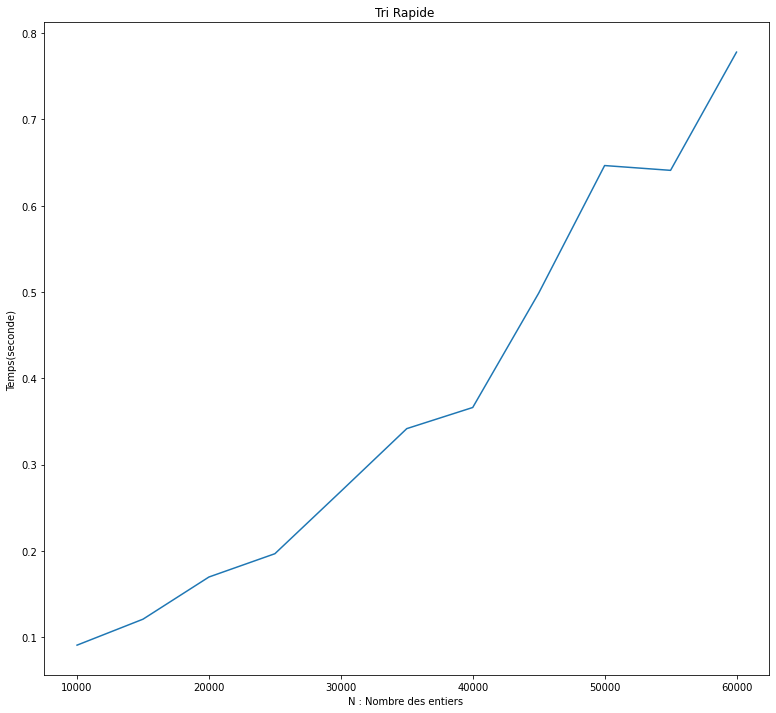

In [6]:
plt.figure(figsize=(13,12))
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000])
y = np.array([0.09094834327697754 , 0.1210331916809082, 0.16990041732788086, 0.19688630104064941, 0.2691078186035156, 0.34182095527648926, 0.36630868911743164, 0.49873876571655273, 0.6466302871704102, 0.6410684585571289, 0.7780411243438721])
plt.plot(x, y)
plt.xlabel("N : Nombre des entiers ")
plt.ylabel("Temps(seconde) ")
plt.title("Tri Rapide ")
plt.show() 


## Tri par sélection

In [7]:
def tri_selection(t, n):

    if n < 2:
        return t
    for i in range(n-1):
        min = t[i]
        imin = i
        for j in range(i+1, n):
            if t[j] < min:
                min = t[j]
                imin = j
        if imin != i:
            t[imin] = t[i]
            t[i] = min
    return t

In [8]:
with Compteur("Tri par sélection"):
    t3 = tri_selection(t, len(t))

Tri par sélection: 321.9726002216339


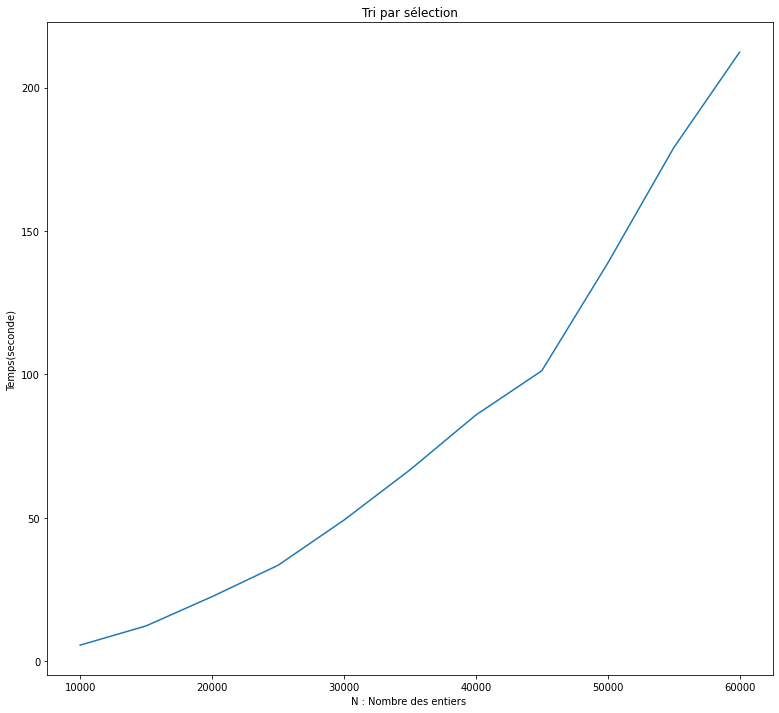

In [9]:
plt.figure(figsize=(13,12))
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000])
y = np.array([5.608956813812256 , 12.324905157089233, 22.52531599998474, 33.44592022895813, 49.218151330947876, 66.714914560318, 85.84835028648376, 101.28695344924927, 138.81094121932983, 179.0379340648651, 212.405686378479])
plt.plot(x, y)
plt.xlabel("N : Nombre des entiers ")
plt.ylabel("Temps(seconde) ")
plt.title("Tri par sélection")
plt.show() 



## Tri à bulle

In [10]:
def tri_bulle(t, n):

    if n < 2:
        return t
    for i in range(n-1):
        for j in range(n-1-i):
            if t[j] > t[j+1]:
                temp = t[j]
                t[j] = t[j+1]
                t[j+1] = temp
    return t

In [11]:
with Compteur("Tri bulle"):
        t4 = tri_bulle(t, len(t))


Tri bulle: 582.7634387016296


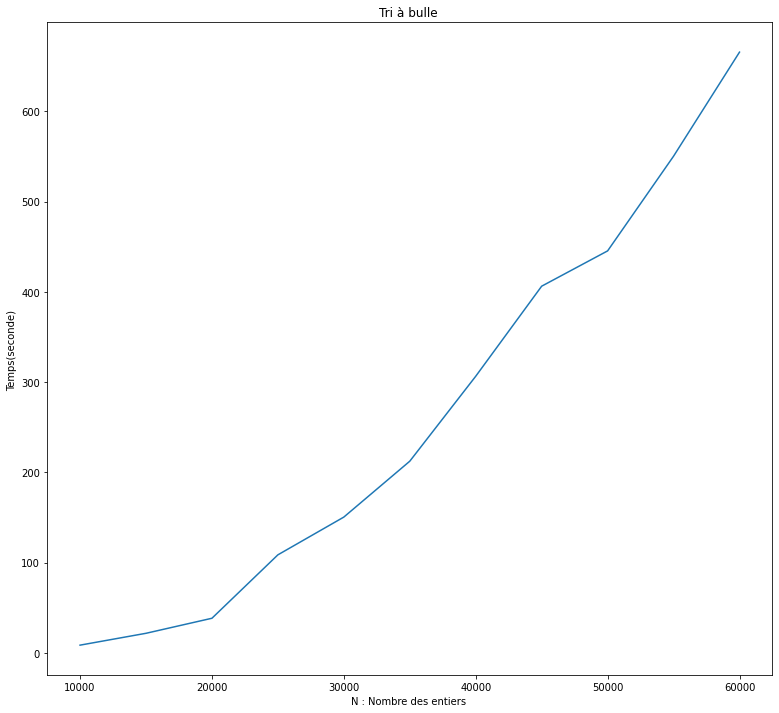

In [12]:
plt.figure(figsize=(13,12))
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000])
y = np.array([8.550340175628662 , 21.685203313827515, 38.34774112701416, 108.61269068717957, 150.45601415634155, 212.35982656478882, 306.4874858856201, 406.2893877029419, 445.39484214782715, 550.3253104686737, 665.628853559494])
plt.plot(x, y)
plt.xlabel("N : Nombre des entiers ")
plt.ylabel("Temps(seconde) ")
plt.title("Tri à bulle ")
plt.show() 


## Tri par insertion

In [13]:
def tri_insertion(t, n):

    if n < 2:
        return t
    for i in range(2, n):
        temp = t[i]
        j = i - 1
        while t[j] > t[i] and j >= 0:
            t[j+1] = t[j]
            j -= 1
        t[j] = temp
    return t

In [14]:
 with Compteur("Tri par insertion"):
        t4 = tri_insertion(t, len(t))

Tri par insertion: 0.062489986419677734


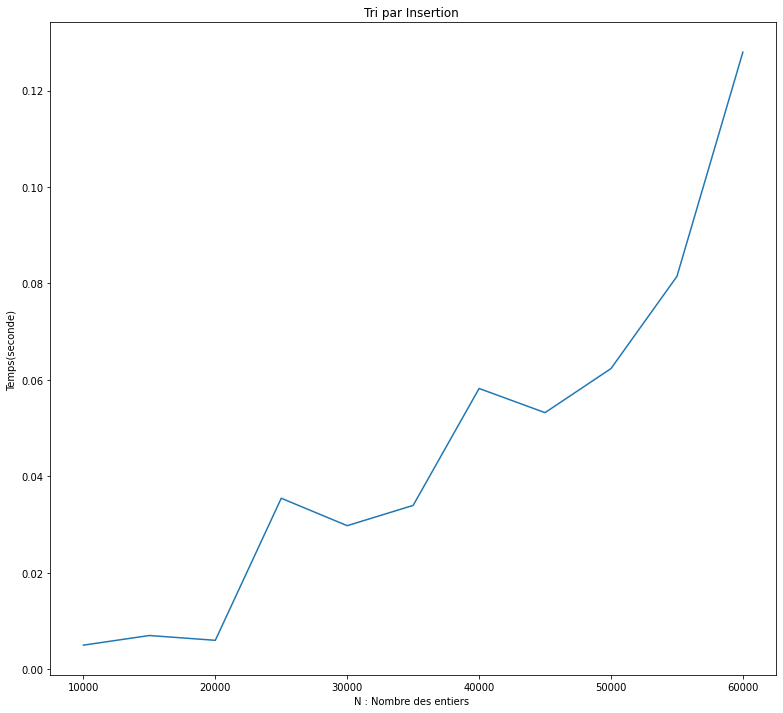

In [15]:
plt.figure(figsize=(13,12))
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000])
y = np.array([0.0049953460693359375 , 0.006994724273681641, 0.005997896194458008, 0.0354609489440918, 0.02977275848388672, 0.03397679328918457, 0.0582273006439209, 0.05321478843688965, 0.06235647201538086, 0.08147287368774414, 0.12798452377319336])
plt.plot(x, y)
plt.xlabel("N : Nombre des entiers ")
plt.ylabel("Temps(seconde) ")
plt.title("Tri par Insertion ")
plt.show() 

## Tri par fusion

In [16]:
def tri_fusion(t, n):

    def vidage(ta, pa, na, t, p):
  
        for i in range(pa, na):
            t[p] = ta[i]
            p += 1
        return t

    if n < 2:
        return t

    p = n // 2
    t1 = t[:p]
    n1 = len(t1)
    t1 = tri_fusion(t1, n1)
    t2 = t[p:]
    n2 = len(t2)
    t2 = tri_fusion(t2, n2)

    p1, p2, p = 0, 0, 0
    
    while p1 < n1 and p2 < n2:
        if t1[p1] < t2[p2]: 
            t[p] = t1[p1]
            p1 += 1
        else:
            t[p] = t2[p2]
            p2 += 1
        p += 1
    if p1 == len(t1):
        vidage(t2, p2, len(t2), t, p)
    else:
        vidage(t1, p1, len(t1), t, p)
    return t

In [17]:
with Compteur("Tri fusion"):
        t5 = tri_fusion(t, len(t))


Tri fusion: 0.412930965423584


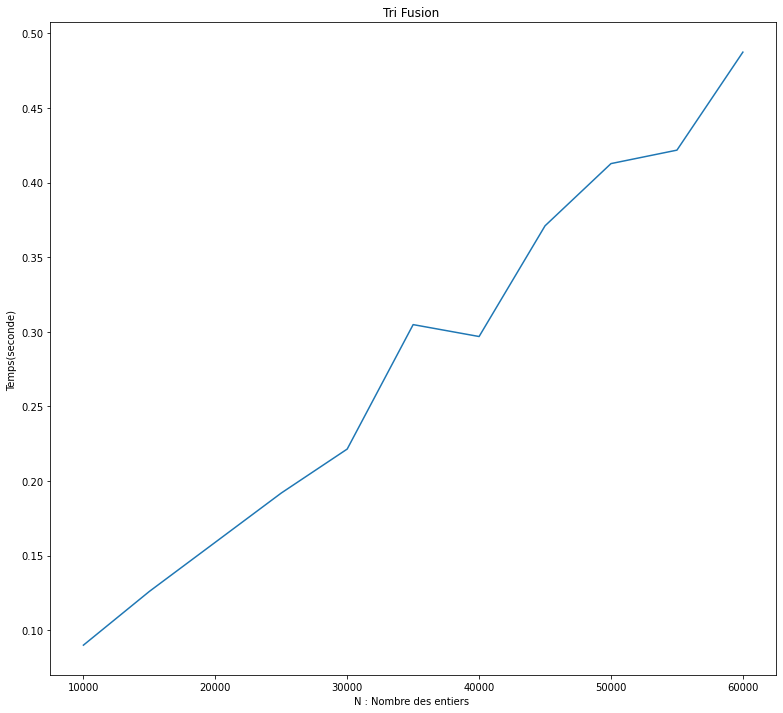

In [18]:
plt.figure(figsize=(13,12))
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000])
y = np.array([0.08995223045349121 , 0.12596869468688965, 0.15892958641052246, 0.19191527366638184, 0.2214069366455078, 0.3048238754272461, 0.2968440055847168, 0.37105560302734375, 0.41276121139526367, 0.4217808246612549, 0.4874844551086426])
plt.plot(x, y)
plt.xlabel("N : Nombre des entiers ")
plt.ylabel("Temps(seconde) ")
plt.title("Tri Fusion ")
plt.show() 

# <font color='red'>Conclusion:</font>

> Au niveau de l’utilisation de la mémoire, c’est toujours le tri rapide qui est le plus performant.